# Book Recommendation System

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# Content

# The Book-Crossing dataset comprises three files
- Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

- Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

- Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

Book Data

In [4]:
book_data = pd.read_csv("D:/ExcelR/ExcelR Final Project/Dataset,objective and groups/Books.csv",encoding='latin-1', low_memory=False )
book_data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
book_data.shape

(271360, 8)

Users Data

In [7]:
users_data= pd.read_csv('D:/ExcelR/ExcelR Final Project/Dataset,objective and groups/Users.csv', encoding='latin-1', low_memory=False)
users_data.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
users_data.shape

(278858, 3)

Ratings Data

In [10]:
ratings_data = pd.read_csv("D:/ExcelR/ExcelR Final Project/Dataset,objective and groups/Ratings.csv",encoding='latin-1', low_memory=False)
ratings_data.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
ratings_data.shape

(1149780, 3)

# Data Preparation (Data Cleaning and Feature Engineering)

# Let's take first book_data dataset

In [13]:
# droping the url
book_data.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [14]:
# replacing '-' with '_' and features name in lower case
book_data.columns= book_data.columns.str.strip().str.lower().str.replace('-', '_')
users_data.columns= users_data.columns.str.strip().str.lower().str.replace('-', '_')
ratings_data.columns= ratings_data.columns.str.strip().str.lower().str.replace('-', '_')

In [15]:

pd.set_option('display.max_colwidth', -1)

In [16]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   isbn                 271360 non-null  object
 1   book_title           271360 non-null  object
 2   book_author          271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [17]:
print(book_data.isnull().sum())

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


In [18]:
# nan values in particular column
book_data.loc[(book_data['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [19]:
# nan values in particular column
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [20]:
# getting unique value from 'year_of_publication' feature
book_data['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2012', '2006', 'DK Publishing Inc', 'Gallimard', '1909',
       

In [21]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
book_data[book_data['year_of_publication'] == 'DK Publishing Inc'] 

,isbn,book_title,book_author,year_of_publication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [22]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
book_data[book_data['year_of_publication'] == 'Gallimard']

,isbn,book_title,book_author,year_of_publication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


There has to make some correction in three rows as you can see in above output. Let's fix it.

In [23]:
book_data.loc[221678]

isbn                   0789466953                                                                                                 
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\";James Buckley"
book_author            2000                                                                                                       
year_of_publication    DK Publishing Inc                                                                                          
publisher              http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg                                               
Name: 221678, dtype: object

In [24]:
book_data.loc[209538]

isbn                   078946697X                                                                                          
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\";Michael Teitelbaum"
book_author            2000                                                                                                
year_of_publication    DK Publishing Inc                                                                                   
publisher              http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg                                        
Name: 209538, dtype: object

In [25]:
book_data.loc[220731]

isbn                   2070426769                                                              
book_title             Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le ClÃ?Â©zio"
book_author            2003                                                                    
year_of_publication    Gallimard                                                               
publisher              http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg            
Name: 220731, dtype: object

In [26]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [27]:
replace_df_value(book_data, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(book_data, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(book_data, 209538, 'year_of_publication', 2000)
replace_df_value(book_data, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(book_data, 221678, 'book_author', 'James Buckley')
replace_df_value(book_data, 221678, 'year_of_publication', 2000)
replace_df_value(book_data, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(book_data, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(book_data, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(book_data, 220731, 'year_of_publication', 2003)
replace_df_value(book_data, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [28]:
book_data.loc[209538]

isbn                   078946697X                                                                    
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author            Michael Teitelbaum                                                            
year_of_publication    2000                                                                          
publisher              DK Publishing Inc                                                             
Name: 209538, dtype: object

In [29]:
book_data.loc[221678]

isbn                   0789466953                                                                                
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author            James Buckley                                                                             
year_of_publication    2000                                                                                      
publisher              DK Publishing Inc                                                                         
Name: 221678, dtype: object

In [30]:
book_data.loc[220731]

isbn                   2070426769                           
book_title             Peuple du ciel, suivi de 'Les Bergers
book_author            Jean-Marie Gustave Le ClÃ?Â©zio      
year_of_publication    2003                                 
publisher              Gallimard                            
Name: 220731, dtype: object

Now it is been fixed. We can view perfect matching for their corresponding features.

We've seen there are two missing values in the 'publisher' column. Let's take care of that. As we have seen

In [31]:
book_data.loc[(book_data['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [32]:
# replacing 'Nan' with 'No Mention'
book_data.loc[(book_data['isbn'] == '193169656X'),'publisher'] = 'No Mention'
book_data.loc[(book_data['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [33]:
df = pd.DataFrame(book_data)
cols = [4]
df = df[df.columns[cols]]

In [34]:
pd.set_option('display.max_columns', None)  
df.head(5)

,publisher
0,Oxford University Press
1,HarperFlamingo Canada
2,HarperPerennial
3,Farrar Straus Giroux
4,W. W. Norton &amp; Company


In [35]:
book_data[book_data['publisher'] == 'No Mention']

,isbn,book_title,book_author,year_of_publication,publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,No Mention
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,No Mention


So we've change the publisher's name from 'NaN' to 'No Mention'.

# Let's see now user_data dataset

In [36]:
# users_data size
print(users_data.shape)


(278858, 3)


In [37]:
# unique value in age
users_data['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

There is NaN value in age. We can replace NaN with mean of 'age'.

In [38]:
# replacing nan with average of 'age'
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [39]:
users_data['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [40]:
# retrieving age data between 5 to 90
users_data.loc[(users_data['age'] > 90) | (users_data['age'] < 5)] = np.nan

In [41]:
users_data['age'].fillna((users_data['age'].mean()), inplace=True)

In [42]:
users_data['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

# Now let's take ratings_data dataset

In [44]:
ratings_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [45]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings_data[ratings_data.isbn.isin(book_data.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [46]:
print(ratings_data.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [47]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

# Data Visualizations

# Book_data dataset
- Analysis No 1

Text(0.5, 1.0, 'Top 20 author with number of books')

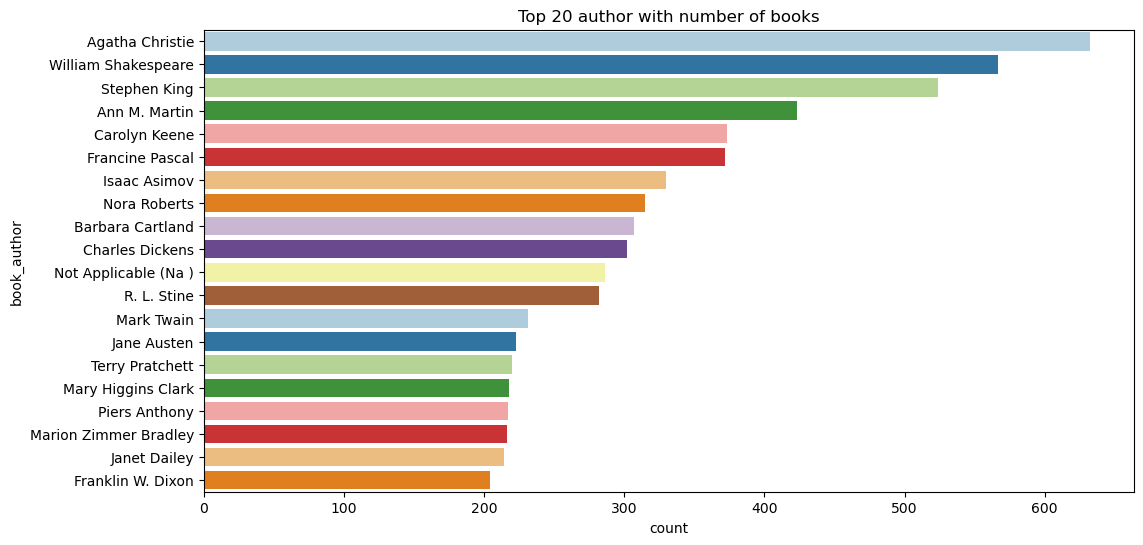

In [48]:
# top Author with number of books
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=book_data,order=book_data['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare. We can plot some hypothesis point :-

- It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
- William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
- Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.

Analysis no.2 -

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

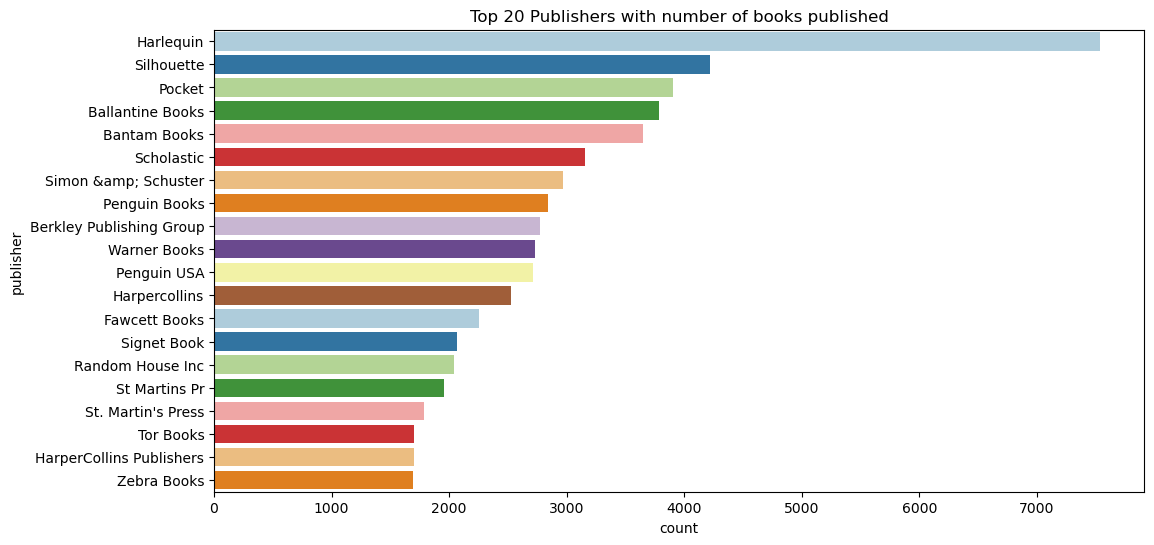

In [49]:
 # top publishers with published books
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-

- Some of the top Author's had published their books from Harlequin.
- We can observe Harlequin publiser's marking better performance than any other publishers.
- Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.
- Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

Analysis no.3 -

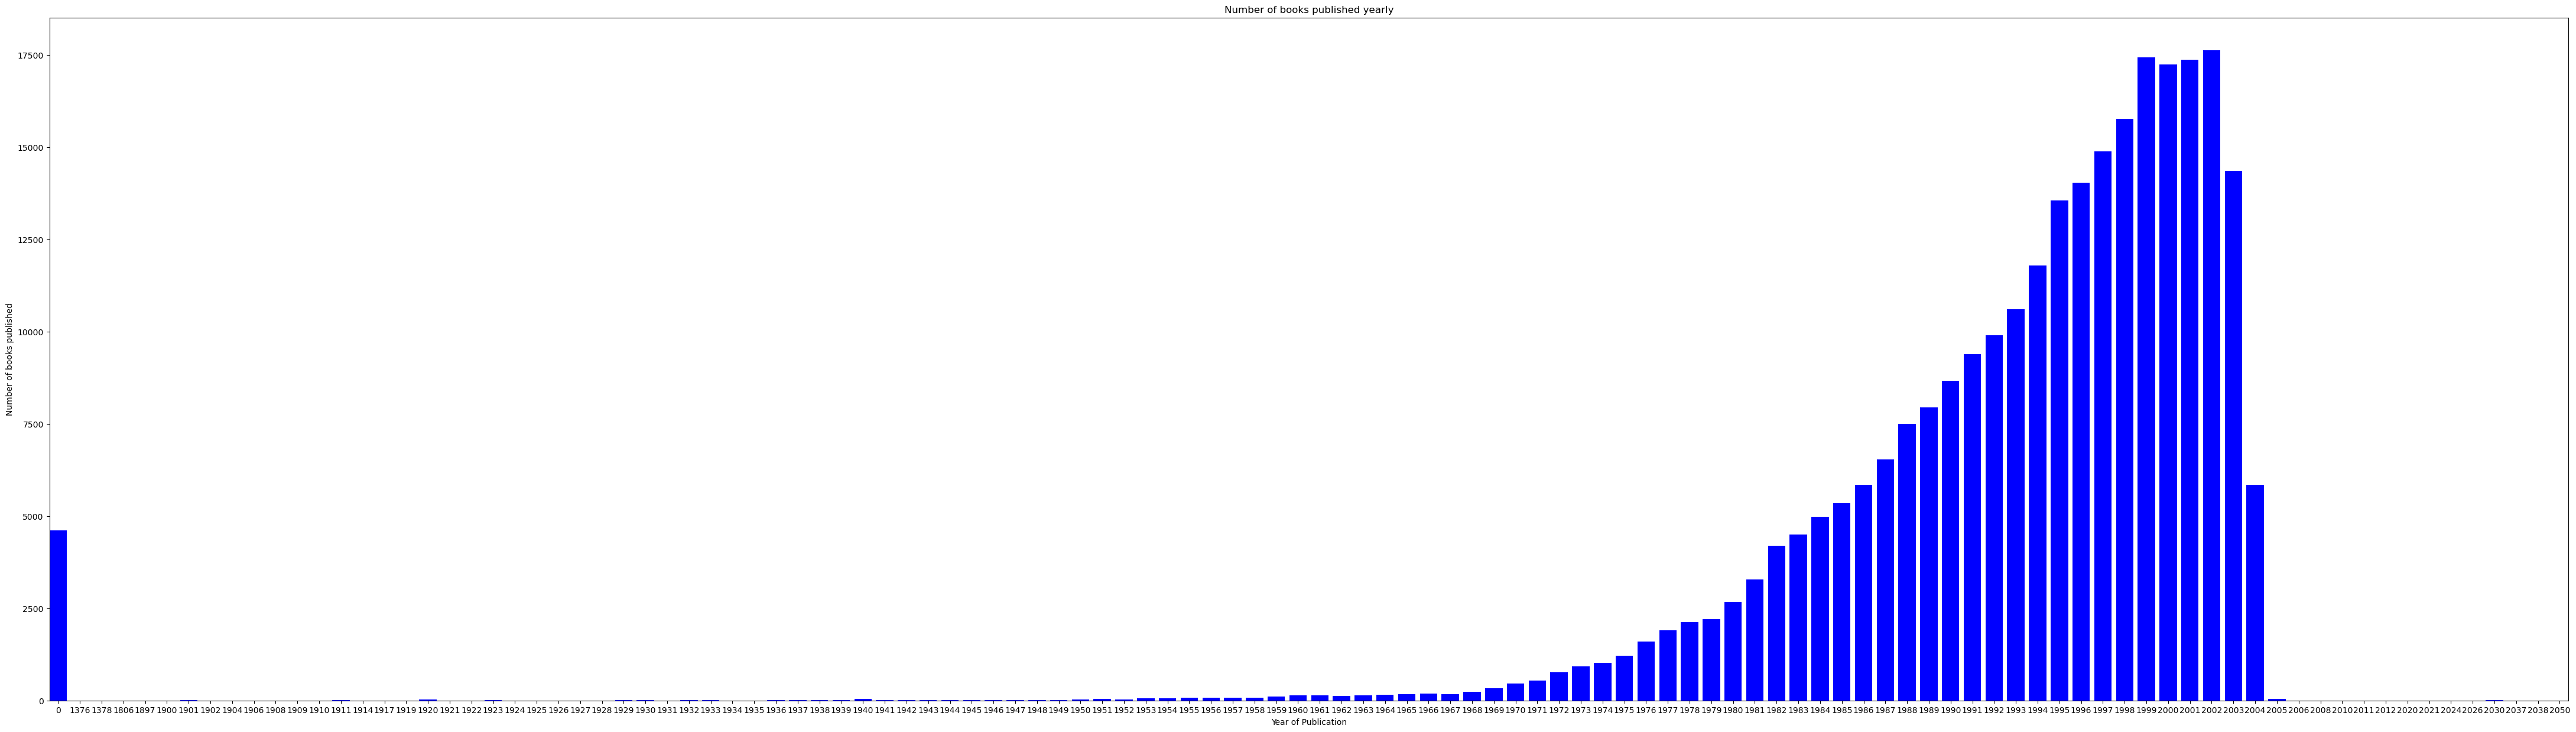

In [50]:
# Number of Books published in yearly.
publications = {}
for year in book_data['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [51]:
book_data.year_of_publication = pd.to_numeric(book_data.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = book_data[book_data.year_of_publication == 0].year_of_publication.count()
nan_year = book_data.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
book_data.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


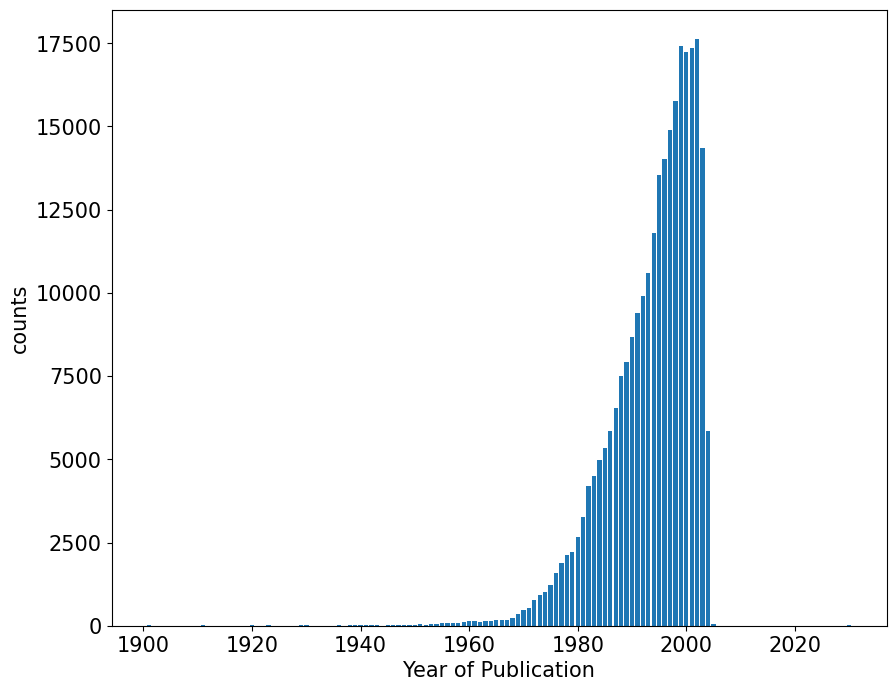

In [52]:
year = book_data.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

- It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
- Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.
- The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

# User_data Dataset

Analysis no.4 -

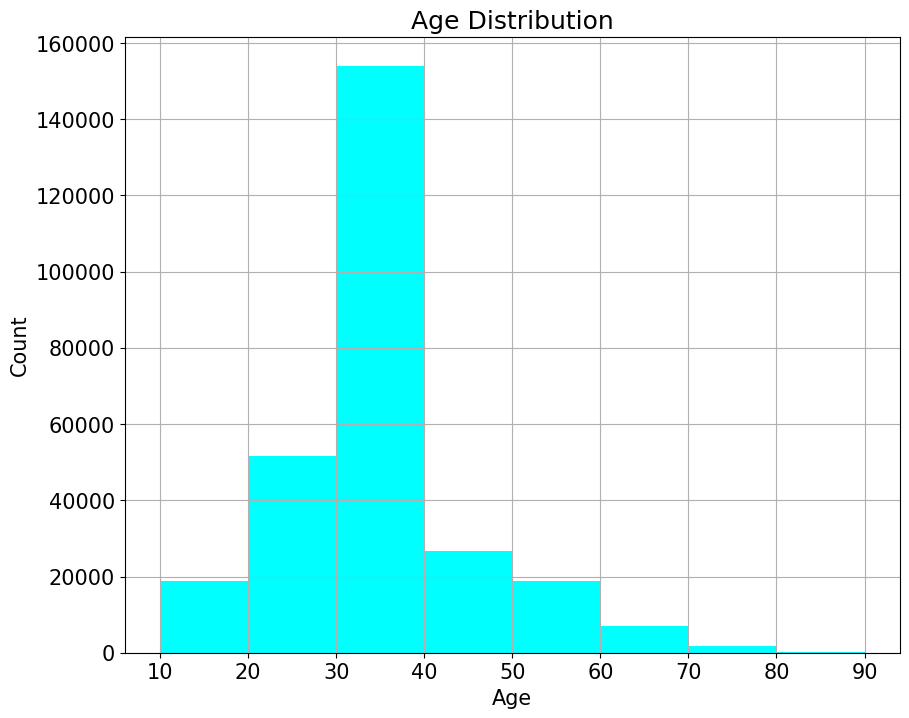

In [53]:
# Age distributions of users_data
plt.figure(figsize=(10,8))
users_data.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looking towards the users age between 30-40 prefer more and somewhat we can also view between 20-30. Let's make some hypothesis analysis:-

- It is obvious that most of the user books are from Age 30 to 40.
- It might happen that the users are more interested on that subject what Authors are publishing in the market.
- The age group between 20-30 are immensely attracted to read books published by Author.
- We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

# Ratings_data Dataset

Analysis No. 5

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

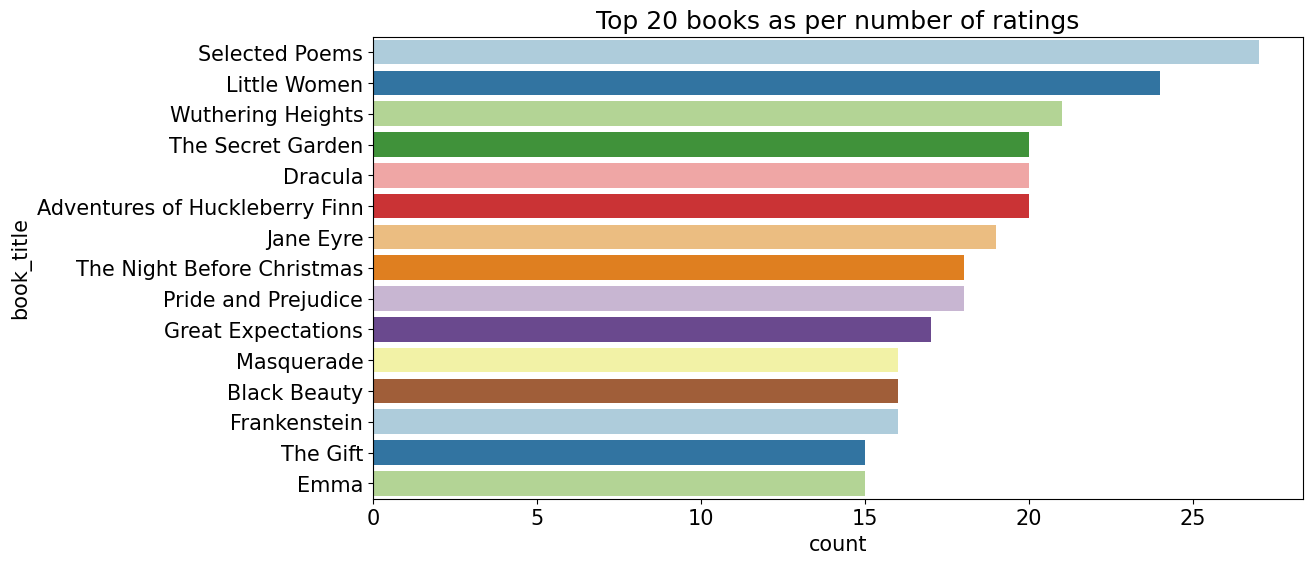

In [54]:
# Top 20 books as per number of ratings
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= book_data, order=book_data['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

As per ratings "Selected Poems" has been rated most followed by "Little Women".

- Selected Poems are most favourable to users as per ratings.
- Three of the books 'The Secret Garden', 'Dracula','Adventures of Huckleberry Finn'are struggling to compete with each other. Similarly, we can observe in 'Masquerade','Black Beauty','Frankenstein'.

<AxesSubplot:xlabel='book_rating', ylabel='count'>

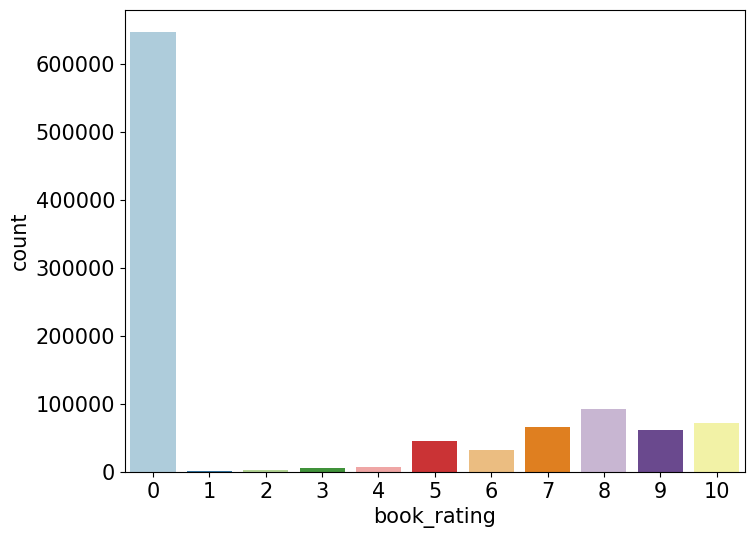

In [55]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Firstly the above ratings are unique ratings from 'ratings_data' and 'books_data' dataset. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0. Let's make some hypothesis assumptions :-

- This countplot shows users have rated 0 the most, which means they haven't rated books at all.
- Still we can see pattern to recognize in ratings from 1-10.
- Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

Text(0.5, 1.0, 'Explicit Ratings')

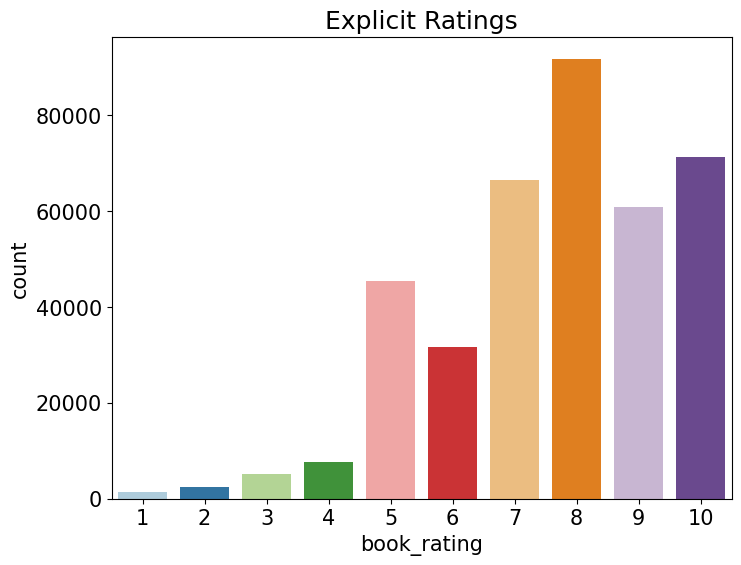

In [56]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times. There can be many assumptions based on ratings of users :-

- Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to - 1. Language 2. Offend by any chapter's incident/paragraph/Author 3. They've read worst book ever.

- If we think analytical about rating 5, it might happen some same reason as above key points mention.

- For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.

- Let's take ratings group from 6-10. This are positive feedback - 1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.2
Since 6 ratings is very low among other ratings. 3. As we can aspect 7 and 8 are average and more ratings from users. 4. 9 and 10 ratings are top best ratings based on Author's, Publisher's and Books been published.

# Recommendation System
Now let's try to build recommendation system based on popularity (i.e ratings). This recommendations are usually given to every user irrespective of personal characterization.

We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0.

In [57]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]   # explicit ratings represented by 1–10
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]   # implicit ratings represented by 0

In [58]:
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [59]:
print(unique_ratings.shape)
print(ratings_explicit.shape)

(1031136, 3)
(383842, 3)


Merging book_data dataset and ratings_explicit. Considering ISBNs that were explicitely rated for this recommendation system.

In [60]:
# Merging book_data dataset and ratings_explicit
new_book_df= pd.merge(book_data, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


In [61]:
print(new_book_df.shape)

(383842, 7)


In [62]:
new_book_df['book_title'].count()

383842

In [63]:
new_book_df['book_title'].nunique()

135567

So we've 135567 number of unique values in book_title columns.

In [64]:
# top ten books as per book ratings and recommendation
top_ten_books= pd.DataFrame(new_book_df.groupby('book_title')['book_rating'].count()
                         .sort_values(ascending=False).head(10))
print('The top ten books as per ratings : ')
top_ten_books

The top ten books as per ratings : 


,book_rating
book_title,
The Lovely Bones: A Novel,707
Wild Animus,581
The Da Vinci Code,494
The Secret Life of Bees,406
The Nanny Diaries: A Novel,393
The Red Tent (Bestselling Backlist),383
Bridget Jones's Diary,377
A Painted House,366
Life of Pi,336


The above are the top 10 books recommendation as per ratings. But this are not based on some recommendation system. They are top 10 books as per ratings.

# Memory-Based Collaborative Filtering
This approach uses the memory of previous users interactions to compute users similarities based on items they've interacted (user-based approach) or compute items similarities based on the users that have interacted with them (item-based approach).

# Train - Test Split

In [65]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [66]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 307073
Testing set lengths: 76769
Test set is 20% of the full dataset.


In [67]:
# Get int mapping for user_id in train dataset
u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset
i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

In [68]:
# Get int mapping for user_id in test dataset
u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in test dataset
i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [69]:
# training set
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# testing set
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to three feature of dataframe 
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [70]:
train_data.sample(5)

,u_unique,i_unique,book_rating
182396,2625,15242,9
109737,3400,3613,9
279085,957,17767,8
154881,1847,69958,7
331717,4120,116958,9


In [71]:
test_data.sample(5)

,u_unique,i_unique,book_rating
345461,1715,43119,7
344245,1536,34884,7
214713,753,32246,5
41982,3442,6344,5
52340,14858,645,9


# User-Item for Train Data

In [74]:
# first I'll create an empty matrix of users books and then I'll add the appropriate values to the matrix by extracting them from the dataset
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # entry[1] is the user-id, entry[2] is the book-isbn and -1 is to counter 0-based indexing

MemoryError: Unable to allocate 57.6 GiB for an array with shape (59973, 128965) and data type float64